# ANALYSIS OF CLIENT BEHAVIOUR AND CHOOSING MORE PROFITABLE PREPAID PLAN

# Introduction <a id='intro'></a>

- An analysis for Megaline, a telecom operator are conducted. Megaline offers two prepaid plans, Surf and Ultimate. The company's commercial department seeks to determine which plan generates higher revenue to make adjustments to the advertising budget. The study will focus on analyzing client behavior using the available data.


> Calls table (data on calls):
> - id — unique call identifier
> - call_date — call date
> - duration — call duration (in minutes)
> - user_id — the identifier of the user making the call

> Internet table (data on web sessions):
> - id — unique session identifier
> - mb_used — the volume of data spent during the session (in megabytes)
> - session_date — web session date
> - user_id — user identifier

> Messages table (data on texts):
> - id — unique text message identifier
> - message_date — text message date
> - user_id — the identifier of the user sending the text

>  Plans table (data on the plans):
> - plan_name — calling plan name
> - usd_monthly_fee — monthly charge in US dollars
> - minutes_included — monthly minute allowance
> - messages_included — monthly text allowance
> - mb_per_month_included — data volume allowance (in megabytes)
> - usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st > - minute will be charged)
> - usd_per_message — price per text after exceeding the package limits
> - usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

> Users table (data on users)
> - user_id — unique user identifier
> - first_name — user's name
> - last_name — user's last name
> - age — user's age (years)
> - reg_date — subscription date (dd, mm, yy)
> - churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this 
> - database was extracted)
>- city — user's city of residence
> - plan — calling plan name

## Goals:

- To determine which prepaid plan generates higher revenue
- To determine which area had higher revenue, either NY-NJ or other than that

<a id="0"></a> <br>
 # Table of Contents  
1. [Stage 1: Data Overview](#1)
    1. [Calls](#2) 
    1. [Internet](#3) 
    1. [Messages](#4) 
    1. [Plans](#5) 
    1. [Users](#6) 
1. [Stage 2: Data Preprocessing](#7) 
    1. ['Calls' table](#8) 
    1. ['Internet' table](#9) 
    1. ['Messages' table](#10) 
    1. ['Plans' table](#11) 
    1. ['Users' table](#12) 
    1. [Number of Calls by Users per Month](#13) 
    1. [Number of Total Minutes Used per Month](#14) 
    1. [Number of messages made per month](#15)
    1. [Number of volume for internet traffic made per month](#16) 
    1. [Combine all 'plans'. 'users' and other aggregated data](#17) 
    1. [Monthly revenue from each user](#18) 
    1. [Column: Region](#19) 
1. [Stage 3: Exploratory Data Analysis](#20)       
    1. [(1) Analyzing the behavior of 'surf' user](#21)
       1. [Minutes per month analysis](#22)
       1. [Messages per month analysis](#23)
       1. [Data Volume analysis](#24)
    1. [(2) Analyzing the behavior of 'ultimate' user](#25)
       1. [Minutes per month analysis](#26)
       1. [Messages per month analysis](#27)
       1. [Data Volume analysis](#28)
1. [Stage 4: Hypothesis Testing](#29) 
    1. [Hypothesis 1: "The average profit from users of Ultimate and Surf calling plans differs"](#30) 
    1. [Hypothesis 2: "The average revenue from users in the NY-NJ area is different from that of the users from the other regions."](#31) 
1. [Stage 5: General Conclusion](#32) 

<a id="1"></a> 
# Stage 1 : Data Overview 

In [1]:
!pip install missingno

In [2]:
from scipy import stats as st #for probability and calculation of statistics
import pandas as pd #for dataframe manipulation
import numpy as np #for advanced mathematic operation
import matplotlib.pyplot as plt #for plotting and visualize graph
import seaborn as sns
import missingno as msno # visualize missing data in table form
import nltk #for string/text manipulation

In [3]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

# read the prepared file and turned it to dataframe

<a id="2"></a> 
## Calls
- Calls dataframe contained info on calls made by each user

In [4]:
calls.info(verbose=True) #finding general info on calls dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
calls.head() #print first five row dataframe of calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


 1. For calls dataframe, the call date needed to be changed into datetime type instead of object
 2. Duration needed to be rounded up instead of in decimal points

In [6]:
calls_duplicates = calls.duplicated().sum()
calls_duplicates #print duplicate data for calls

0

<a id="3"></a> 
## Internet
- Calls dataframe contained info on volume data used by each user

In [7]:
internet.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


1. For internet dataframe, the session_date needed to be changed into datetime type instead of object
2. mb_used data needed to be converted to Gigabytes, then rund them up

<a id="4"></a> 
## Messages
- Calls dataframe contained info on messages made by each user

In [9]:
messages.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


1. For messages dataframe, the message_date needed to be changed into datetime type instead of object

<a id="5"></a> 
## Plans
- Calls dataframe contained info on plans offered by Megaline

In [11]:
plans.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [12]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<a id="6"></a> 
## Users
- Calls dataframe contained info on users

In [13]:
users.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


1. For users dataframe, the reg_date needed to be changed into datetime type instead of object
2. There are missing values in the 'churn_date' column. However, the 'churn_date' is the date when users decided to end their subscription so if it's empty, it means the subscription is ongoing. In this case, the churn_date will be leave as it is

In [15]:
users['churn_date'].fillna('Ongoing', inplace=True)
users.head() # fill the misiing values with 'Ongoing'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Ongoing
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Ongoing
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Ongoing
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Ongoing
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Ongoing


<a id="7"></a> 
# Stage 2: Data Preprocessing

<a id="8"></a> 
## The 'calls' table

In [16]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
# applies the np.ceil method  to the column to round up its values and then converts them to integers

calls.info(verbose=True) #general info on 'calls' table after change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         137735 non-null  object
 1   user_id    137735 non-null  int64 
 2   call_date  137735 non-null  object
 3   duration   137735 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.2+ MB


In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
# converts the 'call_date' values to date-time type using the existing format

calls.info(verbose=True) # general info an 'calls' table after change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [18]:
calls['month'] = calls['call_date'].dt.month_name()
# extracts the month's name from the call_date column and saves it to new 'month' column

calls.head() #first 5 rows of the 'calls' table after the change

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,December
1,1000_145,1000,2018-12-27,14,December
2,1000_247,1000,2018-12-27,15,December
3,1000_309,1000,2018-12-28,6,December
4,1000_380,1000,2018-12-30,5,December


<a id="9"></a> 
## The 'internet' table

In [19]:
internet['mb_used'] = internet['mb_used']/1024
#divides the values in the column by 1024 to convert them to Gigabytes
#(1GB=1024MB)

internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')
#rounds up the values and converts them to integers

internet = internet.rename(columns={'mb_used': 'gb_used'})
#renames the column from mb_used to gb_used

internet.info(verbose=True) #general information after the changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            104825 non-null  object
 1   user_id       104825 non-null  int64 
 2   session_date  104825 non-null  object
 3   gb_used       104825 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


In [20]:
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
# converts the session_date column to the date-time type with the appropriate format

internet.info(verbose=True) #general info of table after changes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   gb_used       104825 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ MB


In [21]:
internet['month'] = internet['session_date'].dt.month_name()
#extracts the month name from the session_date column and saves it to new month column

internet.head() #first 5 rows of the table after changes

,id,user_id,session_date,gb_used,month
0,1000_13,1000,2018-12-29,1,December
1,1000_204,1000,2018-12-31,0,December
2,1000_379,1000,2018-12-28,1,December
3,1000_413,1000,2018-12-26,1,December
4,1000_442,1000,2018-12-27,1,December


<a id="10"></a> 
## The 'messages' table

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
#converts message_date values to date-time type with the appropriate format

messages.info(verbose=True) #general info of table after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [23]:
messages['month'] = messages['message_date'].dt.month_name()
#extracts the month name from 'message_date' and saves it to new month column

messages.head() #dataframe's general info 

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


<a id="11"></a> 
## The 'plans' table

In [24]:
plans['mb_per_month_included'] = plans['mb_per_month_included']/1024
#converts the values of mb to gigabytes 

plans = plans.rename(columns={'mb_per_month_included':'gb_per_month_included'})
#renames the 'mb_per_month_included' column to 'gb_per_month_included'

plans.info(verbose=True)
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


<a id="12"></a> 
## The 'users' table

In [25]:
users['reg_date']=pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
#converts reg_date values to date-time type with the appropriate format

users['plan'] = users['plan'].astype('category')
#converts the 'plan' column to category type

users.info(verbose=True) #general info of table after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  500 non-null    object        
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 28.1+ KB


## Make four new grouping to understand the relationship between number of calls, minutes, messages and volume of internet traffic per month

1. Number of calls by each user per month
2. Number of total minutes used by each user per month
3. Number of messages sent by each user per month
4. Volume data of internet traffic used by each user per month

<a id="13"></a> 
### Number of Calls by Users per Month

In [26]:
agg_user_monthly_calls = calls.groupby(["user_id", "month"])["duration"].aggregate(["count"]).reset_index()
#grouping the 'calls' into count,where count=number_calls_per_month

In [27]:
agg_user_monthly_calls = agg_user_monthly_calls.rename(columns={'count': 'number_calls_per_month'})
agg_user_monthly_calls #rename the column

,user_id,month,number_calls_per_month
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65
...,...,...,...
2253,1498,September,45
2254,1499,December,65
2255,1499,November,45
2256,1499,October,53


In [28]:
missing_values_monthly_calls = agg_user_monthly_calls.isnull().sum()
print(missing_values_monthly_calls)

user_id                   0
month                     0
number_calls_per_month    0
dtype: int64


<a id="14"></a> 
### Number of Total Minutes Used per Month

In [29]:
agg_user_monthly_minutes = calls.groupby(["user_id", "month"])["duration"].aggregate(["sum"]).reset_index()
#grouping the 'calls' into sum ,where sum=total_minuter_per_month

In [30]:
agg_user_monthly_minutes = agg_user_monthly_minutes.rename(columns={'sum': 'total_minutes_per_month'})
agg_user_monthly_minutes #rename the column

,user_id,month,total_minutes_per_month
0,1000,December,124
1,1001,August,182
2,1001,December,412
3,1001,November,426
4,1001,October,393
...,...,...,...
2253,1498,September,363
2254,1499,December,496
2255,1499,November,308
2256,1499,October,385


In [31]:
missing_values_monthly_minutes = agg_user_monthly_minutes.isnull().sum()
print(missing_values_monthly_minutes)

user_id                    0
month                      0
total_minutes_per_month    0
dtype: int64


<a id="15"></a> 
### Number of messages made per month

In [32]:
agg_user_monthly_message = messages.groupby(["user_id", "month"])["message_date"].aggregate(["count"]).reset_index()
#grouping the 'message' into count, count=number_messages_per_month

In [33]:
agg_user_monthly_message = agg_user_monthly_message.rename(columns={'count': 'number_messages_per_month'})
agg_user_monthly_message #rename the column

,user_id,month,number_messages_per_month
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
...,...,...,...
1801,1496,December,11
1802,1496,November,13
1803,1496,October,18
1804,1496,September,21


In [34]:
missing_values_monthly_message = agg_user_monthly_message.isnull().sum()
print(missing_values_monthly_message) #check missing values

user_id                      0
month                        0
number_messages_per_month    0
dtype: int64


<a id="16"></a> 
### Number of volume for internet traffic made per month

In [35]:
agg_user_monthly_internet = internet.groupby(["user_id", "month"])["gb_used"].aggregate(["sum"]).reset_index()
#grouping the 'internet' into sum, sum=gb_used_per_month

In [36]:
agg_user_monthly_internet = agg_user_monthly_internet.rename(columns={'sum': 'gb_used_per_month'})
agg_user_monthly_internet #rename the column

,user_id,month,gb_used_per_month
0,1000,December,4
1,1001,August,21
2,1001,December,55
3,1001,November,49
4,1001,October,50
...,...,...,...
2272,1498,September,52
2273,1499,December,58
2274,1499,November,43
2275,1499,October,52


In [37]:
missing_values_monthly_internet = agg_user_monthly_internet.isnull().sum()
print(missing_values_monthly_internet) #check missing values

user_id              0
month                0
gb_used_per_month    0
dtype: int64


<a id="17"></a> 
### Combine all 'plans'. 'users' and other aggregated data

In [38]:
# Step 1: Merge 'plans' and 'users' together on plan_name and right on plan    
merged_plan_users = pd.merge(plans, users, how='inner', left_on='plan_name', right_on='plan')

In [39]:
# Step 2: Merge (plan&users) with aggregated calls data on user_id
merged_calls_data = pd.merge(merged_plan_users, agg_user_monthly_calls, on='user_id')

In [40]:
# Step 3: Merge (merged_calls_data) with aggregated message data on user_id
merged_minutes_data = pd.merge(
    merged_calls_data,
    agg_user_monthly_minutes[['user_id', 'total_minutes_per_month','month']],
    on=['user_id', 'month'],
    how="outer"
    )

In [41]:
# Step 4: Merge (merged_calls_data) with aggregated message data on user_id
final_merged_data = pd.merge(
    merged_minutes_data, 
    agg_user_monthly_message[['user_id', 'number_messages_per_month','month']],
    on=['user_id','month'],
    how="outer"
    )

In [42]:
# Step 5: Merge (final_merged_data) with aggregated internet data on user_id
final_merged_data = pd.merge(
    final_merged_data,
    agg_user_monthly_internet[['user_id', 'gb_used_per_month','month']],
    on=['user_id','month'],
    how="outer"
    )
final_merged_data

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,user_id,first_name,...,age,city,reg_date,plan,churn_date,month,number_calls_per_month,total_minutes_per_month,number_messages_per_month,gb_used_per_month
0,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Ongoing,August,27.0,182.0,30.0,21.0
1,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Ongoing,December,56.0,412.0,44.0,55.0
2,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Ongoing,November,64.0,426.0,36.0,49.0
3,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Ongoing,October,65.0,393.0,53.0,50.0
4,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Ongoing,September,49.0,315.0,44.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1349,NaN,...,NaN,NaN,NaT,NaN,NaN,October,NaN,NaN,76.0,27.0
2289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1361,NaN,...,NaN,NaN,NaT,NaN,NaN,May,NaN,NaN,2.0,7.0
2290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1482,NaN,...,NaN,NaN,NaT,NaN,NaN,October,NaN,NaN,2.0,NaN
2291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1108,NaN,...,NaN,NaN,NaT,NaN,NaN,December,NaN,NaN,NaN,2.0


In [43]:
missing_values = final_merged_data.isnull().sum()
print(missing_values) #check missing values

messages_included             35
gb_per_month_included         35
minutes_included              35
usd_monthly_pay               35
usd_per_gb                    35
usd_per_message               35
usd_per_minute                35
plan_name                     35
user_id                        0
first_name                    35
last_name                     35
age                           35
city                          35
reg_date                      35
plan                          35
churn_date                    35
month                          0
number_calls_per_month        35
total_minutes_per_month       35
number_messages_per_month    487
gb_used_per_month             16
dtype: int64


In [44]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   messages_included          2258 non-null   float64       
 1   gb_per_month_included      2258 non-null   float64       
 2   minutes_included           2258 non-null   float64       
 3   usd_monthly_pay            2258 non-null   float64       
 4   usd_per_gb                 2258 non-null   float64       
 5   usd_per_message            2258 non-null   float64       
 6   usd_per_minute             2258 non-null   float64       
 7   plan_name                  2258 non-null   object        
 8   user_id                    2293 non-null   int64         
 9   first_name                 2258 non-null   object        
 10  last_name                  2258 non-null   object        
 11  age                        2258 non-null   float64       
 12  city  

In [45]:
final_merged_data['plan'] = final_merged_data['plan'].astype(object) #change 'plan' from category to object

In [46]:
final_merged_data.fillna(0, inplace=True) #fill the missing values with'0'

In [47]:
missing_values = final_merged_data.isnull().sum()
print(missing_values) #check missing values again for confirmation

messages_included            0
gb_per_month_included        0
minutes_included             0
usd_monthly_pay              0
usd_per_gb                   0
usd_per_message              0
usd_per_minute               0
plan_name                    0
user_id                      0
first_name                   0
last_name                    0
age                          0
city                         0
reg_date                     0
plan                         0
churn_date                   0
month                        0
number_calls_per_month       0
total_minutes_per_month      0
number_messages_per_month    0
gb_used_per_month            0
dtype: int64


In [48]:
final_merged_data

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,user_id,first_name,...,age,city,reg_date,plan,churn_date,month,number_calls_per_month,total_minutes_per_month,number_messages_per_month,gb_used_per_month
0,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,Ongoing,August,27.0,182.0,30.0,21.0
1,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,Ongoing,December,56.0,412.0,44.0,55.0
2,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,Ongoing,November,64.0,426.0,36.0,49.0
3,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,Ongoing,October,65.0,393.0,53.0,50.0
4,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,Ongoing,September,49.0,315.0,44.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1349,0,...,0.0,0,0,0,0,October,0.0,0.0,76.0,27.0
2289,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1361,0,...,0.0,0,0,0,0,May,0.0,0.0,2.0,7.0
2290,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1482,0,...,0.0,0,0,0,0,October,0.0,0.0,2.0,0.0
2291,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1108,0,...,0.0,0,0,0,0,December,0.0,0.0,0.0,2.0


<a id="18"></a> 
## Monthly revenue from each user
- Monthly revenue were calculated from each user, based on the condition of:

In [49]:
def monthly_profit(row): # make a function called monthly_profit that takes a table row as argument
    minutes_diff = 0 # make a variable called mins_diff and sets it to zero
    messages_diff = 0 # make a variable called mess_diff and sets it to zero
    gb_diff = 0 # make a variable called gb_diff and sets it to zero
    profit=0 # make a variable called profit and sets it to zero
    
    #conditional statement
    if row["plan_name"] == 'surf': 
        
        if row['total_minutes_per_month'] > row["minutes_included"]:
            
            minutes_diff = row['total_minutes_per_month'] - row["minutes_included"]
            # minutes_diff will take the value of the 'total_minutes_per_month' column minus the package limit for surf
            
        if row['number_messages_per_month'] > row["messages_included"]:
        
            messages_diff = row['number_messages_per_month'] - row["messages_included"]
            # messages_diff becomes the difference between the value at the 'number_messages_per_month' column and
            # the package limit for surf
            
        if row['gb_used_per_month'] > row["gb_per_month_included"]: 
            gb_diff = row['gb_used_per_month'] - row["gb_per_month_included"]
            # gb_diff becomes the difference between the value at the 'gb_used_per_month' coulmn and the
            # package limit for surf
            
        profit = (minutes_diff * .03) + (messages_diff * .03) + (gb_diff * 10)
        # profit for 'surf'
    
    #conditional statement 
    if row["plan_name"] == 'ultimate': 
        
        if row['total_minutes_per_month'] > row["minutes_included"]:
            
            minutes_diff = row['total_minutes_per_month'] - row["minutes_included"]
            # minutes_diff will take the value of the 'total_minutes_per_month' column minus the package limit for
            # ultimate
  
        if row['number_messages_per_month'] > row["messages_included"]:
            
            messages_diff = row['number_messages_per_month'] - row["messages_included"]
            # message_diff becomes the difference between the value at the 'number_messages_per_month' column and
            # the package limit for ultimate
            
        if row['gb_used_per_month'] > row["gb_per_month_included"]: 
            gb_diff = row['gb_used_per_month'] - row["gb_per_month_included"]
            # gb_diff becomes the difference between the value at the 'gb_used_per_month' coulmn and the
            # package limit for ultimate
            
        profit = (minutes_diff * .01) + (messages_diff * .01) + (gb_diff * 7)
        # profit for 'ultimate'
        
    return profit #returns the value of the profit variable

final_merged_data['monthly_profit'] = final_merged_data.apply(monthly_profit, axis=1)
# applies the new column monthly_profit to 'user_stats' table

final_merged_data

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,user_id,first_name,...,city,reg_date,plan,churn_date,month,number_calls_per_month,total_minutes_per_month,number_messages_per_month,gb_used_per_month,monthly_profit
0,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,Ongoing,August,27.0,182.0,30.0,21.0,60.00
1,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,Ongoing,December,56.0,412.0,44.0,55.0,400.00
2,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,Ongoing,November,64.0,426.0,36.0,49.0,340.00
3,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,Ongoing,October,65.0,393.0,53.0,50.0,350.09
4,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13 00:00:00,surf,Ongoing,September,49.0,315.0,44.0,41.0,260.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1349,0,...,0,0,0,0,October,0.0,0.0,76.0,27.0,0.00
2289,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1361,0,...,0,0,0,0,May,0.0,0.0,2.0,7.0,0.00
2290,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1482,0,...,0,0,0,0,October,0.0,0.0,2.0,0.0,0.00
2291,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1108,0,...,0,0,0,0,December,0.0,0.0,0.0,2.0,0.00


In [50]:
final_merged_data['monthly_profit'].isna().sum()

0

<a id="19"></a> 
## Column: Region
- The purpose of adding table of  'region' to user_stats table are to differentiate between NY-NJ area and others area

In [51]:
final_merged_data['city'].unique() # check the unique value in city

array(['Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Albuquerque, NM MSA', 'Boston-Cambridge-Newton, MA-NH MSA',
       'Miami-Fort Lauderdale-West Palm Beach, FL MSA',
       'San Diego-Chula Vista-Carlsbad, CA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Ph

- From this list, the specific states that are NY and NJ, and any multi-state area that has 'NY-NJ' will be categorised into 'ny-nj'. Other than that, the areas will be categorized as 'other'

In [52]:
def region(city):
    if pd.isna(city) or city == '0':  # Check if the city is NaN or '0'
        return 'other'
    
    if isinstance(city, str):  # Check if the value is a string
        no_commas = city.split(",")  # Split the city string into fragments using commas
        for entry in no_commas:
            if ('NY-NJ' in entry) or (entry == 'NY') or (entry == 'NJ'):
                return 'ny-nj'
    
    return 'other'

final_merged_data['region'] = final_merged_data['city'].apply(region)

In [53]:
final_merged_data

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,user_id,first_name,...,reg_date,plan,churn_date,month,number_calls_per_month,total_minutes_per_month,number_messages_per_month,gb_used_per_month,monthly_profit,region
0,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,2018-08-13 00:00:00,surf,Ongoing,August,27.0,182.0,30.0,21.0,60.00,other
1,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,2018-08-13 00:00:00,surf,Ongoing,December,56.0,412.0,44.0,55.0,400.00,other
2,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,2018-08-13 00:00:00,surf,Ongoing,November,64.0,426.0,36.0,49.0,340.00,other
3,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,2018-08-13 00:00:00,surf,Ongoing,October,65.0,393.0,53.0,50.0,350.09,other
4,50.0,15.0,500.0,20.0,10.0,0.03,0.03,surf,1001,Mickey,...,2018-08-13 00:00:00,surf,Ongoing,September,49.0,315.0,44.0,41.0,260.00,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1349,0,...,0,0,0,October,0.0,0.0,76.0,27.0,0.00,other
2289,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1361,0,...,0,0,0,May,0.0,0.0,2.0,7.0,0.00,other
2290,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1482,0,...,0,0,0,October,0.0,0.0,2.0,0.0,0.00,other
2291,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,1108,0,...,0,0,0,December,0.0,0.0,0.0,2.0,0.00,other


<AxesSubplot:>

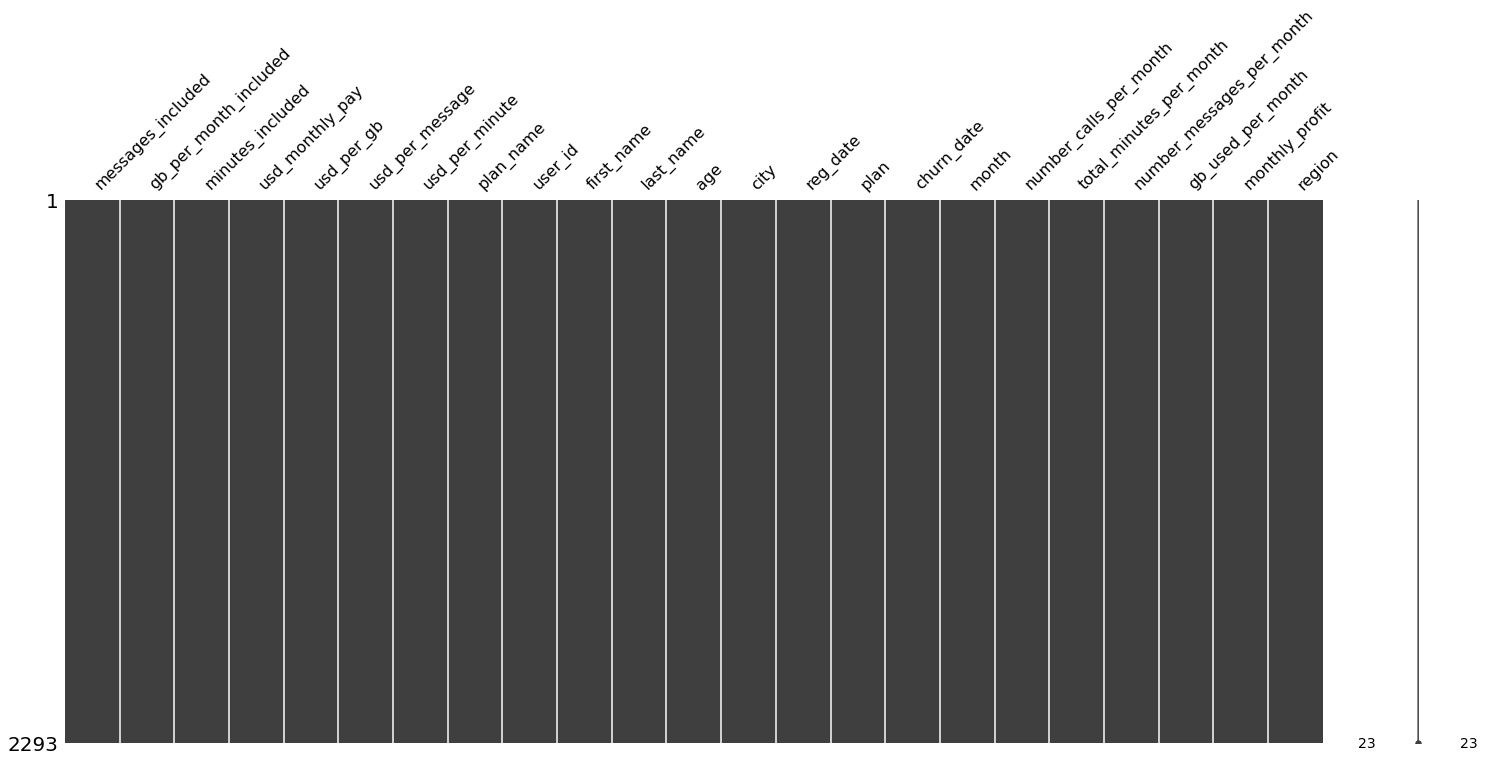

In [54]:
msno.matrix(final_merged_data) # check the missing values in 'final_merged_data'

<a id="20"></a> 
# Stage 3: Exploratory Data Analysis
1. Surf: minutes, messages, and volume of data users of each plan requires per month will be analyzed
2. Ultimate: minutes, messages, and volume of data users of each plan requires per month will be analyzed
3. Note: To achieve above, slices for 'surf' and 'ultimate' will be needed to be create

<a id="21"></a> 
## (1) Analyzing the behavior of 'surf' user

In [55]:
surf_slice = final_merged_data.query('plan == "surf"')
# make a slice of data where the plan column value is surf

surf_slice.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1544
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   messages_included          1545 non-null   float64
 1   gb_per_month_included      1545 non-null   float64
 2   minutes_included           1545 non-null   float64
 3   usd_monthly_pay            1545 non-null   float64
 4   usd_per_gb                 1545 non-null   float64
 5   usd_per_message            1545 non-null   float64
 6   usd_per_minute             1545 non-null   float64
 7   plan_name                  1545 non-null   object 
 8   user_id                    1545 non-null   int64  
 9   first_name                 1545 non-null   object 
 10  last_name                  1545 non-null   object 
 11  age                        1545 non-null   float64
 12  city                       1545 non-null   object 
 13  reg_date                   1545 non-null   objec

<a id="22"></a> 
### Minutes per month analysis

In [56]:
surf_slice['total_minutes_per_month'].describe() 

count    1545.000000
mean      436.519741
std       229.283805
min         0.000000
25%       279.000000
50%       430.000000
75%       579.000000
max      1510.000000
Name: total_minutes_per_month, dtype: float64

In [57]:
np.var(surf_slice['total_minutes_per_month']) # finds the variance of the total_minutes_per_month column

52537.03666530514

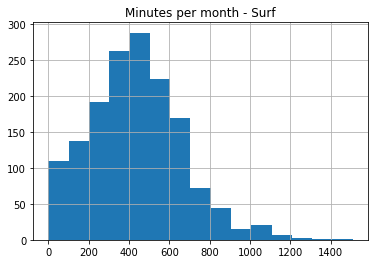

In [58]:
surf_slice['total_minutes_per_month'].hist(bins=15) 
# plots a histogram with 15 bins for the total_minutes_per_month column

plt.title('Minutes per month - Surf')

plt.show() 

- It can be mentioned that the majority of surf plan users make calls ranging from 200 minutes to 650 minutes, with a notable peak around 350 minutes. A gradual decline is noticeable on both ends of this range. Notably, the mean exceeds the median, indicating a positive skew or a right skew in the histogram.


<a id="23"></a> 
### Messages per month analysis

In [59]:
surf_slice['number_messages_per_month'].describe() 

count    1545.000000
mean       30.897735
std        33.644455
min         0.000000
25%         3.000000
50%        24.000000
75%        46.000000
max       266.000000
Name: number_messages_per_month, dtype: float64

In [60]:
np.var(surf_slice['number_messages_per_month']) 

1131.2167262596747

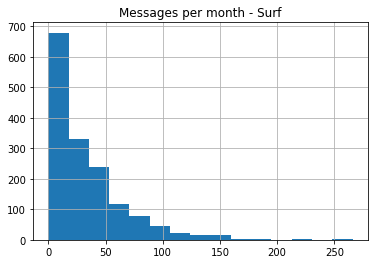

In [61]:
surf_slice['number_messages_per_month'].hist(bins=15)
plt.title('Messages per month - Surf')
plt.show()

- It can be observed that a consistent decline, with the peak occurring between 0 and approximately 10 messages per month. This suggests that more individuals are texting less frequently, while fewer people are texting more frequently.

<a id="24"></a> 
### Data Volume analysis

In [62]:
surf_slice['gb_used_per_month'].describe() 

count    1545.000000
mean       40.166990
std        17.642112
min         0.000000
25%        31.000000
50%        42.000000
75%        52.000000
max       132.000000
Name: gb_used_per_month, dtype: float64

In [63]:
np.var(surf_slice['gb_used_per_month'])

311.04266440443644

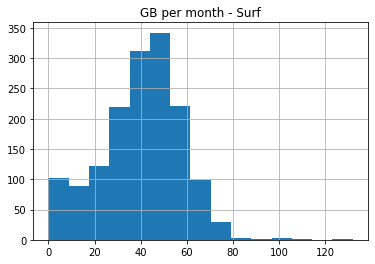

In [64]:
surf_slice['gb_used_per_month'].hist(bins=15)
plt.title('GB per month - Surf')
plt.show()

- It can be observed that there are a prominent peak around 35GB per month, with usual usage falling between approximately 30GB and 50GB. An outlier is evident in the histogram, indicating that two or three individuals utilize around 80GB monthly. The disparity between the mean and median is minimal, suggesting that the histogram appears to have no skew. However, upon excluding the outliers (approximately 80GB), a more pronounced negative skew can be observed.

<a id="25"></a> 
## (2) Analyzing the behavior of 'ultimate' user

In [65]:
ultimate_slice = final_merged_data.query('plan == "ultimate"')
# make a slice of data where the plan column value is ultimate

ultimate_slice.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1545 to 2257
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   messages_included          713 non-null    float64
 1   gb_per_month_included      713 non-null    float64
 2   minutes_included           713 non-null    float64
 3   usd_monthly_pay            713 non-null    float64
 4   usd_per_gb                 713 non-null    float64
 5   usd_per_message            713 non-null    float64
 6   usd_per_minute             713 non-null    float64
 7   plan_name                  713 non-null    object 
 8   user_id                    713 non-null    int64  
 9   first_name                 713 non-null    object 
 10  last_name                  713 non-null    object 
 11  age                        713 non-null    float64
 12  city                       713 non-null    object 
 13  reg_date                   713 non-null    obj

<a id="26"></a> 
### Minutes per month analysis

In [66]:
ultimate_slice['total_minutes_per_month'].describe() 

count     713.000000
mean      434.676017
std       237.852123
min         0.000000
25%       263.000000
50%       425.000000
75%       566.000000
max      1369.000000
Name: total_minutes_per_month, dtype: float64

In [67]:
np.var(ultimate_slice['total_minutes_per_month'])

56494.28633925357

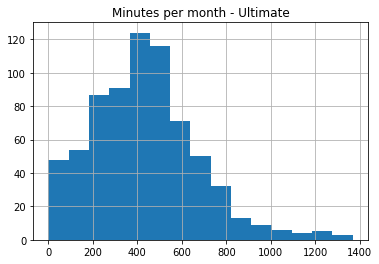

In [68]:
ultimate_slice['total_minutes_per_month'].hist(bins=15)
plt.title('Minutes per month - Ultimate')
plt.show()

- It can be observed that most of the users spend around between 200 and 500 minutes a month. From the histogram, it's evident that anything over 750 falls into outlier territory, and their outlier territory is more densely populated compared to that of the surf users. Upon removing the outliers, a more pronounced negative skew can be observed.

<a id="27"></a> 
### Messages per month analysis

In [69]:
ultimate_slice['number_messages_per_month'].describe() 

count    713.000000
mean      37.725105
std       34.787116
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: number_messages_per_month, dtype: float64

In [70]:
np.var(ultimate_slice['number_messages_per_month'])

1208.4461719735077

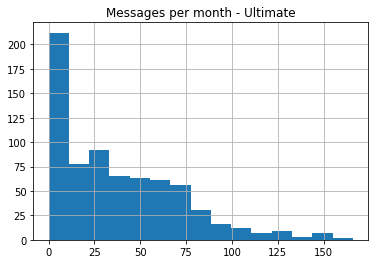

In [71]:
ultimate_slice['number_messages_per_month'].hist(bins=15)
plt.title('Messages per month - Ultimate')
plt.show()

- It can be mentioned that there are a consistent decline overall, with the peak occurring between 25 to 30 messages. This histogram exhibits more noise compared to its surf counterpart, and an outlier is noticeable around 140 messages.

<a id="28"></a> 
### Data Volume analysis

In [72]:
ultimate_slice['gb_used_per_month'].describe() 

count    713.000000
mean      41.267882
std       16.293991
min        1.000000
25%       32.000000
50%       42.000000
75%       51.000000
max       96.000000
Name: gb_used_per_month, dtype: float64

In [73]:
np.var(ultimate_slice['gb_used_per_month'])

265.1217875204822

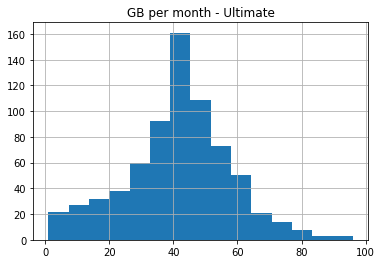

In [74]:
ultimate_slice['gb_used_per_month'].hist(bins=15)
plt.title('GB per month - Ultimate')
plt.show()

- A peak of around 40GB which higher than surf data can be observed with the typical range falling between approximately 45 to 50GB. The graph exhibits a negative skew.

 Conclusion
- (1) Surf - It can be deduced that most of the surf plan makes call between 200 and 650 minutes, with the data usage of around 30GB TO 50GB. Most of them sending messages 0 to about 10 messages in a month.
- (2) Ultimate - It can be observed that most of the surf plan makes call between 200 and 500 minutes, with the data usage of around 30GB TO 50GB. Most of them sending messages 0 to about 10 messages in a month.

<a id="29"></a> 
# Stage 4: Hypothesis Testing

<a id="30"></a> 
## Hypothesis Test 1: "The average profit from users of Ultimate and Surf calling plans differs"

- Null hypothesis: "The average profit from users of Ultimate and Surf calling plans differs".
- Alternate hypothesis: : "The average profit from users of Ultimate and Surf calling plans are the same".

In [75]:
np.var(ultimate_slice['monthly_profit'])

7541.187605853228

In [76]:
np.var(surf_slice['monthly_profit'])

25944.065967006467

- The difference of variance between both plan quite far from each other

In [77]:
alpha = 0.05 # setting statistical significance at 5%

results_plan = st.ttest_ind(ultimate_slice['monthly_profit'], surf_slice['monthly_profit'], equal_var=False)
# performing the test on the monthly_profit columns of both slices specifying that their variances are not
# equal

print('p-value:', results_plan.pvalue) # prints out the p-value from the test

# conditional statement
if results_plan.pvalue < alpha:
# if the p-value less than alpha meaning the averages are not the same
    print('Accept the null hypothesis')
else:
#if not
    print('Reject the null hypothesis')

p-value: 5.283749023560163e-181
Accept the null hypothesis


- Null hypothesis are accepted. It can be observed that p-value is lesser than alpha value, in which means that average of both sets are not likely to be equal.

<a id="31"></a> 
## Hypothesis Test 2: "The average revenue from users in the NY-NJ area is different from that of the users from the other regions."

- Null hypothesis: "The average profit from users in NY-NJ area is different from that of the users from other regions".
- Alternate hypothesis: : "The average profit from users in NY-NJ area is same as that of the users from other regions".

In [78]:
nynj_slice = final_merged_data.query('region == "ny-nj"')
nynj_slice.info(verbose=True)
# create slice where region is ny-nj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 42 to 2244
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   messages_included          371 non-null    float64
 1   gb_per_month_included      371 non-null    float64
 2   minutes_included           371 non-null    float64
 3   usd_monthly_pay            371 non-null    float64
 4   usd_per_gb                 371 non-null    float64
 5   usd_per_message            371 non-null    float64
 6   usd_per_minute             371 non-null    float64
 7   plan_name                  371 non-null    object 
 8   user_id                    371 non-null    int64  
 9   first_name                 371 non-null    object 
 10  last_name                  371 non-null    object 
 11  age                        371 non-null    float64
 12  city                       371 non-null    object 
 13  reg_date                   371 non-null    objec

In [79]:
other_area_slice = final_merged_data.query('region == "other"')
other_area_slice.info(verbose=True)
# create slice where region is other

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 0 to 2292
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   messages_included          1922 non-null   float64
 1   gb_per_month_included      1922 non-null   float64
 2   minutes_included           1922 non-null   float64
 3   usd_monthly_pay            1922 non-null   float64
 4   usd_per_gb                 1922 non-null   float64
 5   usd_per_message            1922 non-null   float64
 6   usd_per_minute             1922 non-null   float64
 7   plan_name                  1922 non-null   object 
 8   user_id                    1922 non-null   int64  
 9   first_name                 1922 non-null   object 
 10  last_name                  1922 non-null   object 
 11  age                        1922 non-null   float64
 12  city                       1922 non-null   object 
 13  reg_date                   1922 non-null   objec

In [80]:
np.var(nynj_slice['monthly_profit'])

23013.73040323159

In [81]:
np.var(other_area_slice['monthly_profit'])

26752.710716358833

- The difference of variance between both area quite far from each other

In [82]:
alpha = 0.05
results_area = st.ttest_ind(nynj_slice['monthly_profit'], other_area_slice['monthly_profit'], equal_var=False)
print('p-value:', results_area.pvalue)
if results_area.pvalue < alpha:
    print('Accept the null hypothesis')
else:
    print('Reject the null hypothesis')

p-value: 9.999577488953713e-05
Accept the null hypothesis


- Null hypothesis are rejected. It can be observed that p-value is more than alpha value, in which means that average of both sets are likely to be equal.

<a id="32"></a> 
# Stage 5: General conclusion 


- It can be analyzed that the minutes per month, messages per month, and data volume per month of the users for both surf and ultimate plans,have similar behaviour. 

2 t-tests were conducted to test two hypothesis:
- Hypothesis 1: Average profit from users of Ultimate and Surf calling plans differs
- Hypothesis 2: Average profit from users in NY-NJ area is same as that of the users from other regions